In [1]:
import torch
import torch.nn as nn
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import imageio

In [3]:
v=5.
gravity=9.8
#model parameters, i.e.,number of independent and
#dependent variables
input_size=1
output_size=1
#Prepare the physics based data
#number of samples for  training and test
nsamp=10
x_data=torch.zeros((nsamp,1))
y_data=torch.zeros((nsamp,1))

In [4]:
for i in range(0,nsamp):
    length=np.random.ranf()/2. 
    x_data[i]=length
    y_data[i]=4.*pi*pi*length/gravity
    


#Data normalization
def normalize(x):
    x_normed = x / x.max(0, keepdim=True)[0]
    return x_normed

x_data=normalize(x_data)
y_data=normalize(y_data)

In [5]:
class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        super(LinearRegression,self).__init__()
        self.linear=nn.Linear(input_size,output_size)
    
    def forward(self,x):
        y_out=self.linear(x)
        return y_out
    
#Model description
model=LinearRegression(input_size,output_size)
#Mean squared error (MSE) loss function
criterion=nn.MSELoss()
#stochastic gradient descent (SGD) optimization
#lr is the learning-rate
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

In [6]:
for epoch in range(2500):
    
    #initial prediction with a forward-pass
    y_predict=model(x_data)
    
    #compute the error functin
    loss=criterion(y_predict,y_data)
    #minimize error with gradients
    optimizer.zero_grad()
    #update the weights
    loss.backward()
    optimizer.step()

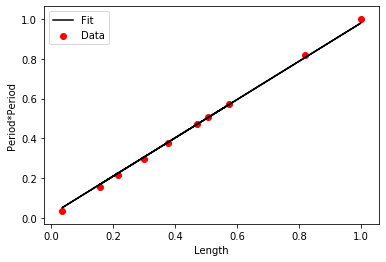

In [7]:
y_new=model(x_data).detach()


plt.scatter(x_data,y_data,label='Data',c='r')
plt.plot(x_data,y_new,label='Fit',c='black')
plt.xlabel('Length')
plt.ylabel('Period*Period')
plt.legend()